# Group No 254


#### Team Members:-

- Piyush Mehar - 20BCE10065 - piyush.mehar2020@vitbhopal.ac.in


- Anubhav Shukala - 20BCE10708 - anubhavshukla.2020@vitbhopal.ac.in

------------------------------

### Importing all the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier


### Reading the dataset

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Analyzing the dataset

In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Now we are checking the null value in the dataset

In [6]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


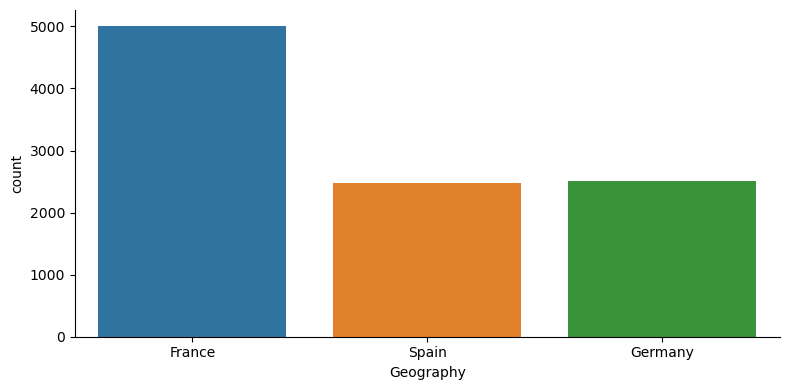

In [7]:
print(df['Geography'].value_counts())

sns.catplot(data=df, kind='count', x='Geography', height=4, aspect=2)

Male      5457
Female    4543
Name: Gender, dtype: int64


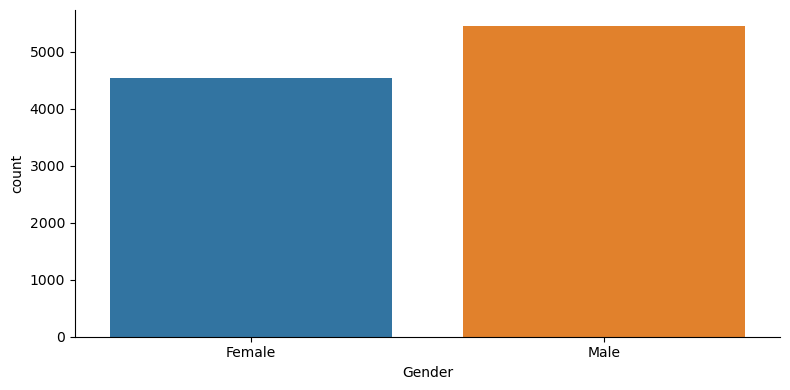

In [12]:
print(df['Gender'].value_counts())

sns.catplot(data=df, kind='count', x='Gender', height=4, aspect=2)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

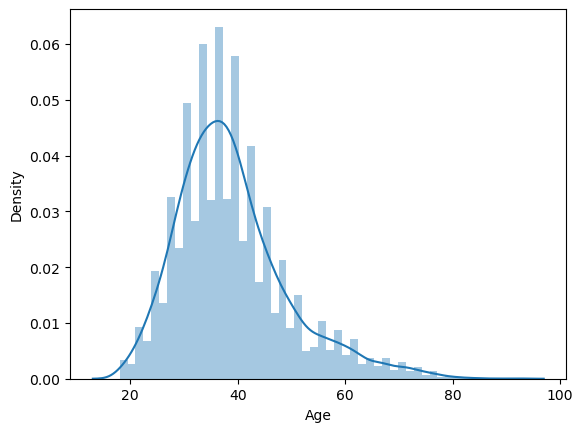

In [14]:
sns.distplot(df['Age'])


### Dropping the unnecessary Columns

In [8]:
df.drop(columns=['Surname','RowNumber'],inplace=True)

In [9]:
df.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

Finding the correlation between columns :-

<AxesSubplot:>

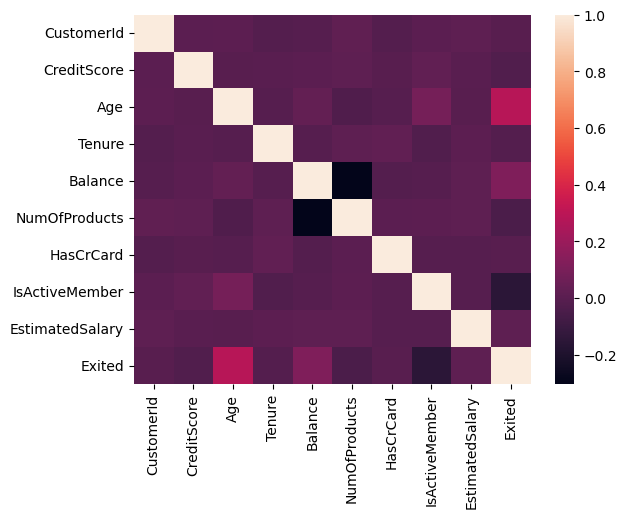

In [10]:
sns.heatmap(df.corr())

Finding the categorical columns

In [15]:
categorical_cols = df.select_dtypes(include='object').columns
print(categorical_cols)

Index(['Geography', 'Gender'], dtype='object')


In [16]:
df

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Encoding 

In [17]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Gender'] = labelencoder.fit_transform(df['Gender'])
df

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [18]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Geography'] = labelencoder.fit_transform(df['Geography'])
df

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,1,1,42,3,75075.31,2,1,0,92888.52,1


<AxesSubplot:>

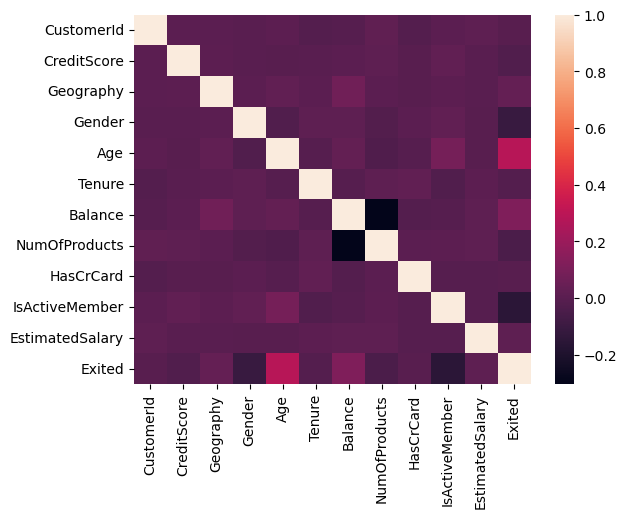

In [19]:
sns.heatmap(df.corr())

### Spliting the data into dependent and independent variables

In [20]:
X = df.drop(columns='Exited', axis=1)
Y = df['Exited']

In [21]:
X

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,0,1,39,5,0.00,2,1,0,96270.64
9996,15569892,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,15584532,709,0,0,36,7,0.00,1,0,1,42085.58
9998,15682355,772,1,1,42,3,75075.31,2,1,0,92888.52


In [22]:
Y


0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

### Spliting the data in Train and Test

In [23]:
# from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


### Building the model with appropriate ML algorithms with pre-processed data

{Testing accuracy using different Algorithms}

In [42]:
lr_model = LogisticRegression(random_state=0)
lr_model.fit(x_train, y_train)
pred_lr = lr_model.predict(x_test)
acc_lr = accuracy_score(y_test, pred_lr)
print(acc_lr)
conf_lr = confusion_matrix(y_test,pred_lr)
conf_lr


0.8085


array([[1617,    0],
       [ 383,    0]], dtype=int64)

In [31]:
gNB_model = GaussianNB()
gNB_model.fit(x_train,y_train)
pred_gNB = gNB_model.predict(x_test)
acc_gNB = accuracy_score(y_test,pred_gNB)
print(acc_gNB)
conf_gNB = confusion_matrix(y_test,pred_gNB)
conf_gNB

0.795


array([[1569,   48],
       [ 362,   21]], dtype=int64)

In [32]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(x_train, y_train)
pred_knn = knn_model.predict(x_test)
acc_knn = accuracy_score(y_test, pred_knn)
print(acc_knn)
conf_knn = confusion_matrix(y_test,pred_knn)
conf_knn

0.7855


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([[1550,   67],
       [ 362,   21]], dtype=int64)

In [33]:
dt_model = DecisionTreeClassifier(criterion='entropy')
dt_model.fit(x_train, y_train)
pred_dt = dt_model.predict(x_test)
acc_dt = accuracy_score(y_test, pred_dt)
print(acc_dt)
conf_dt = confusion_matrix(y_test,pred_dt)
conf_dt

0.7845


array([[1397,  220],
       [ 211,  172]], dtype=int64)

In [34]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
pred_rf = rf_model.predict(x_test)
acc_rf = accuracy_score(y_test, pred_rf)
print(acc_rf)
conf_rf = confusion_matrix(y_test,pred_rf)
conf_rf

0.856


array([[1560,   57],
       [ 231,  152]], dtype=int64)

In [35]:
xgb_model = XGBClassifier(n_estimators=200)
xgb_model.fit(x_train, y_train)
pred_xgb = xgb_model.predict(x_test)
acc_xgb = accuracy_score(y_test, pred_xgb)
print(acc_xgb)
conf_xgb = confusion_matrix(y_test,pred_xgb)
conf_xgb

0.847


array([[1533,   84],
       [ 222,  161]], dtype=int64)

{Using the Random Forest Classifier as it is giving the highest accuracy}

In [37]:
input_data = (15647311,608,2,0,41,1,83807.86,1,0,1,112542.58)
# input_data = (0,56.00,1,52.00,1,52.00,0,66.0,0,59.43,0,1,0,1)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = xgb_model.predict(input_data_reshaped)
print(prediction)

print(prediction[0])

[0]
0


### Saving the Model

In [43]:
import pickle

In [44]:
# saving the model into the disk
pickle.dump(rf_model, open('model.pkl' , 'wb'))

# loading the model to disk
model = pickle.load(open('model.pkl','rb'))